Load the Dataset

In [2]:
from ucimlrepo import fetch_ucirepo
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
# Step 1: Load the dataset
adult = fetch_ucirepo(id=2)
X = adult.data.features
y = adult.data.targets

Extract X and Y \
    education and education num, occupation,marital-status

In [4]:
X_age = np.array(X)[:,0]
X_wh = np.array(X)[:,12]
X_eduNum = np.array(X)[:,4]
X_sex = np.array(X)[:,9]
X_ms = np.array(X)[:,5]
y = np.array(y)[:]
y_cleaned = np.array([label[0].replace('.', '') for label in y])
encoder = LabelEncoder()
y = encoder.fit_transform(y_cleaned)
print(y)
print(np.unique(y))

[0 0 0 ... 0 0 1]
[0 1]


In [5]:
sex_encoder = LabelEncoder()
X_sex = sex_encoder.fit_transform(X_sex)
print(X_sex)
print(np.unique(X_sex))

[1 1 1 ... 1 1 1]
[0 1]


In [6]:
ms = LabelEncoder()
X_ms = ms.fit_transform(X_ms)
print(X_ms)
print(np.unique(X_ms))

[4 2 0 ... 2 0 2]
[0 1 2 3 4 5 6]


In [7]:
X = np.column_stack((X_age, X_eduNum, X_wh, X_sex, X_ms))
print(X.shape)

X = pd.DataFrame(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

(48842, 5)
[[ 0.02599598  1.136512   -0.03408696  0.70422049  0.91613819]
 [ 0.82830842  1.136512   -2.21303208  0.70422049 -0.41039699]
 [-0.04694151 -0.41933527 -0.03408696  0.70422049 -1.73693217]
 ...
 [-0.04694151  1.136512    0.77292975  0.70422049 -0.41039699]
 [ 0.39068346  1.136512   -0.03408696  0.70422049 -1.73693217]
 [-0.26575399  1.136512    1.57994645  0.70422049 -0.41039699]]


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=1234)

Part1: random forest

Finding best combination of parameters

In [9]:

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize Random Forest
rf = RandomForestClassifier(random_state=1234)

# Perform Grid Search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", grid_search.best_params_)
# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.4f}")

# # Detailed performance metrics
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 300}


In [10]:
# Best estimator
best_rf = grid_search.best_estimator_

# Test the best model on the test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")

# Display detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.8288

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     11104
           1       0.69      0.54      0.60      3549

    accuracy                           0.83     14653
   macro avg       0.77      0.73      0.75     14653
weighted avg       0.82      0.83      0.82     14653



Graphs

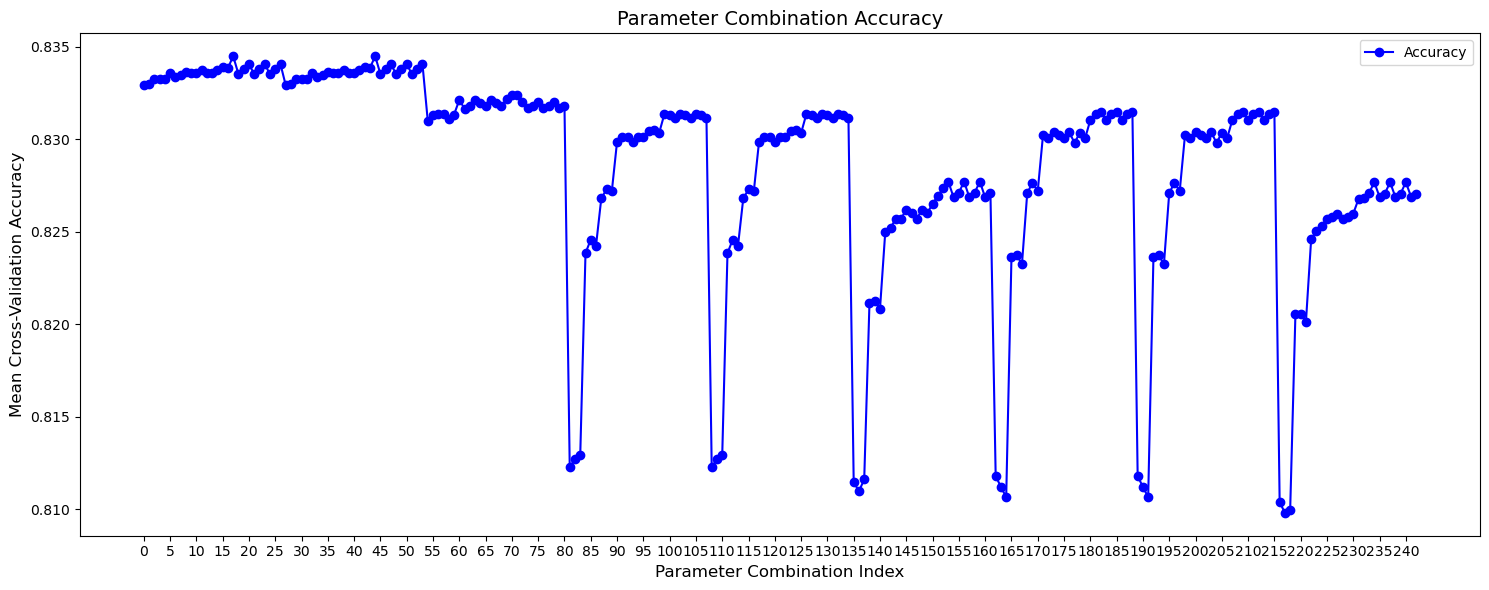

In [25]:
# Extract results from GridSearchCV
results = pd.DataFrame(grid_search.cv_results_)

# Get the mean test scores and parameters
scores = results['mean_test_score']
params = results['params']

# Add scores to the DataFrame for easier plotting
results['accuracy'] = scores

# Visualize each parameter combination's accuracy
plt.figure(figsize=(15, 6))
plt.plot(range(len(scores)), scores, marker='o', linestyle='-', color='b', label='Accuracy')

# Add labels and titles
plt.title("Parameter Combination Accuracy", fontsize=14)
plt.xlabel("Parameter Combination Index", fontsize=12)
plt.ylabel("Mean Cross-Validation Accuracy", fontsize=12)
plt.xticks(range(0, len(scores), 5))
plt.legend()
plt.tight_layout()

plt.show()

Part 2: Decision tree

In [13]:
from sklearn.tree import DecisionTreeClassifier


# Define parameter grid for Decision Tree
param_grid = {
    'criterion': ['gini', 'entropy'],       # Splitting criteria
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 10, 20],       # Minimum samples to split a node
    'min_samples_leaf': [1, 5, 10],         # Minimum samples in a leaf node
}

# Initialize Decision Tree
dt = DecisionTreeClassifier(random_state=1234)

# Perform Grid Search
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Display best parameters
print("Best parameters found: ", grid_search_dt.best_params_)

# Best estimator
best_dt = grid_search_dt.best_estimator_

# Test the best model on the test set
y_pred_dt = best_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy: {accuracy_dt:.4f}")

# Display detailed performance metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters found:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}
Test Accuracy: 0.8270

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89     11104
           1       0.69      0.53      0.60      3549

    accuracy                           0.83     14653
   macro avg       0.77      0.73      0.74     14653
weighted avg       0.82      0.83      0.82     14653



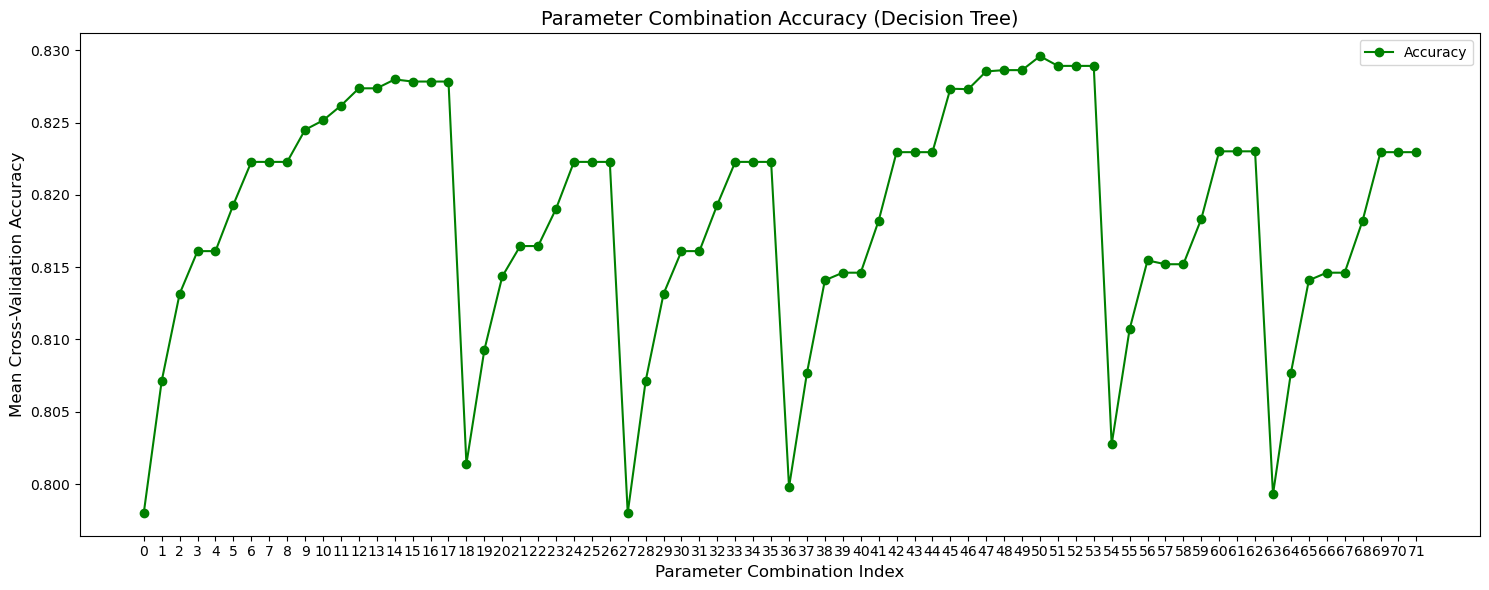

In [26]:
# Extract results from GridSearchCV
results_dt = pd.DataFrame(grid_search_dt.cv_results_)

# Get the mean test scores and parameters
scores_dt = results_dt['mean_test_score']
params_dt = results_dt['params']

# Add scores to the DataFrame for easier plotting
results_dt['accuracy'] = scores_dt

# Visualize each parameter combination's accuracy
plt.figure(figsize=(15, 6))
plt.plot(range(len(scores_dt)), scores_dt, marker='o', linestyle='-', color='g', label='Accuracy')

# Add labels and titles
plt.title("Parameter Combination Accuracy (Decision Tree)", fontsize=14)
plt.xlabel("Parameter Combination Index", fontsize=12)
plt.ylabel("Mean Cross-Validation Accuracy", fontsize=12)
plt.xticks(range(len(scores_dt)))
plt.legend()
plt.tight_layout()

plt.show()


C:\Users\34865\AppData\Local\Temp\ipykernel_25980\1874250433.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(range(len(scores_dt))), y=scores_dt, palette='coolwarm')


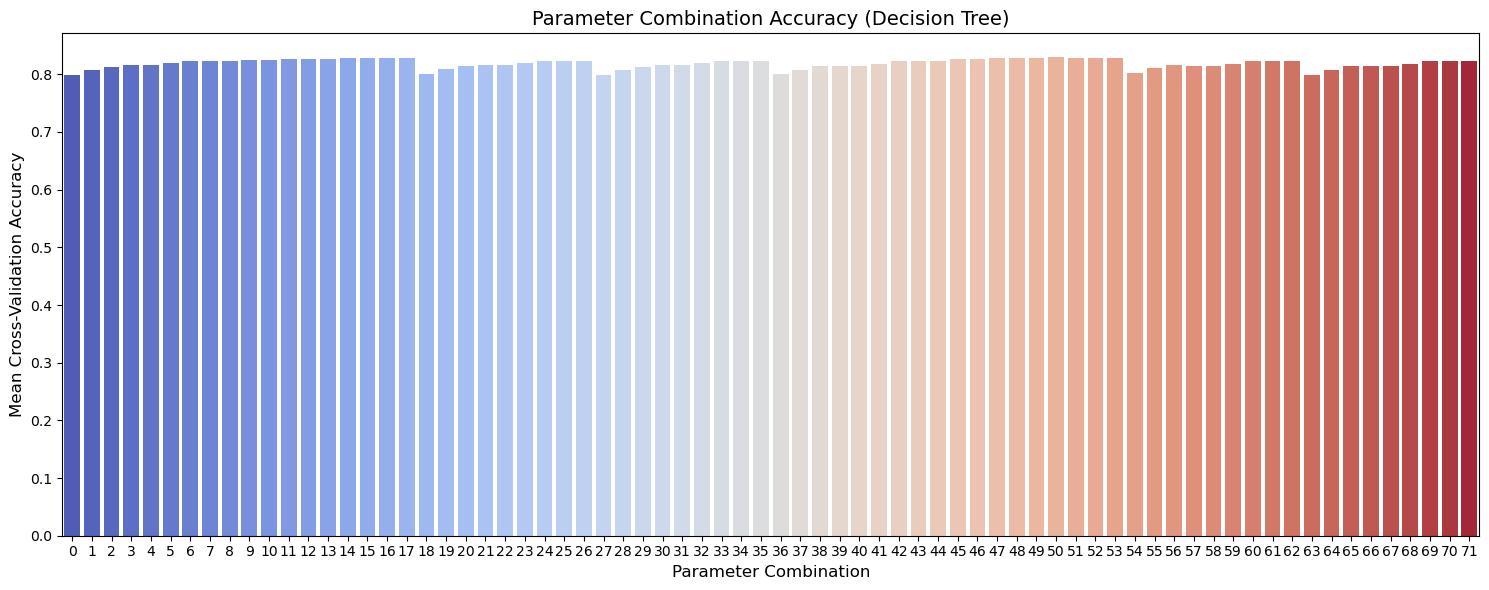

In [27]:
# Create a DataFrame with parameter combinations and scores
df_plot_dt = pd.DataFrame({'Combination': [str(p) for p in params_dt], 'Accuracy': scores_dt})

# Sort by accuracy for better visualization
df_plot_dt = df_plot_dt.sort_values(by='Accuracy', ascending=False)

# Plot
plt.figure(figsize=(15, 6))
sns.barplot(x=list(range(len(scores_dt))), y=scores_dt, palette='coolwarm')

plt.title("Parameter Combination Accuracy (Decision Tree)", fontsize=14)
plt.xlabel("Parameter Combination", fontsize=12)
plt.ylabel("Mean Cross-Validation Accuracy", fontsize=12)
plt.tight_layout()
plt.show()
